# Used Random forest classification for the problem

In [132]:
#Importing all the required libraries
import re
import pandas as pd
import matplotlib as plt
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


from keras.utils import to_categorical
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.preprocessing.sequence import pad_sequences

In [38]:
'''Data Preprocessing and cleaning steps'''

with open("train.txt", "r") as f:
    lines = f.read().splitlines()

list_of_rows = []

for line in lines:
    list_of_rows.append(re.split(r'\t+', line))    

In [55]:
data = pd.DataFrame(list_of_rows, columns = ["Word", "NER"])
print(len(data))

data.insert(0,"sentence", [0] * len(data), True)

count = 1
for i in range(len(data)):
    data.loc[i,"sentence"] = count
    if len(data.loc[i,"Word"]) == 0 :
        count+=1
        data.drop([i],axis = 0, inplace = True)
        
data[30:50]

66125


,sentence,Word,NER
31,2,:,O
32,2,AHFA,B-group
33,2,extends,O
34,2,deadline,O
35,2,for,O
36,2,Sage,O
37,2,Award,O
38,2,to,O
39,2,Nov,O
40,2,.,O


In [56]:
len(data)

62730

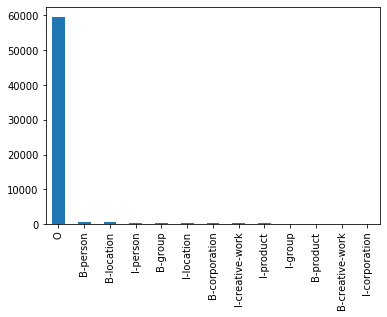

In [57]:
'''Data analysis and visualization'''

bins = data["NER"].value_counts()
total = data["NER"].count()
bins = bins.apply(lambda x: float(x)/total)

data["NER"].value_counts().plot(kind = "bar")
# plt.show()

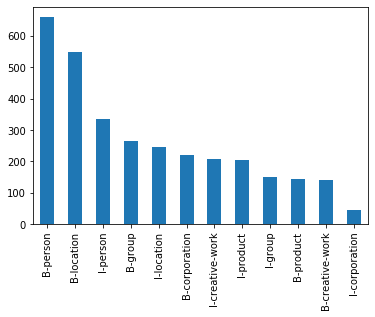

In [58]:
data["NER"].value_counts().drop("O", axis = 0).plot(kind = "bar")

In [18]:
data = data.fillna(method="ffill")

In [59]:
data.to_csv('out.csv')

In [60]:
'''Feature Engineering'''

def feature_map(word):
    '''Simple feature map.'''
    return np.array([word.istitle(), word.islower(), word.isupper(), len(word),
                     word.isdigit(),  word.isalpha()])

words = [feature_map(w) for w in data["Word"].values.tolist()]

tags = data["NER"].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(words, tags, test_size=0.33, random_state=66)

In [114]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
# predictions
rfc_predict = rfc.predict(X_test)

In [130]:
'''Printing classification confidence scores or class probabilities of all the lables which are not O'''
class_probabilities = rfc.predict_proba(X_test)
class_probabilities.shape
temp = 0
for item in class_probabilities:
    if y_test[temp] is not 'O':
        print(y_test[temp], '\t', max(item))
    temp+=1    

B-group 	 0.8281630492353074
B-corporation 	 0.9250681408304194
B-group 	 0.9250681408304194
I-location 	 0.6599104994996449
B-creative-work 	 0.9906140702459508
I-product 	 0.9932760775839776
B-location 	 0.9743212778548866
I-person 	 0.6562737394559847
B-location 	 0.9250681408304194
B-creative-work 	 0.6796940413968279
I-location 	 0.9724051752283541
I-person 	 0.6599104994996449
B-group 	 0.6336254173215001
I-person 	 0.928021745656474
B-person 	 0.6599104994996449
B-corporation 	 0.4999811015923547
I-person 	 0.6336254173215001
B-product 	 0.6562737394559847
B-group 	 0.6882891341872331
B-person 	 0.6562737394559847
B-creative-work 	 0.9841069160004163
B-person 	 0.6599104994996449
B-person 	 0.6599104994996449
I-product 	 0.7817621451686474
I-creative-work 	 0.6882891341872331
B-location 	 0.6247865429723649
I-product 	 0.7817621451686474
B-person 	 0.6562737394559847
B-location 	 0.6562737394559847
B-group 	 0.6562737394559847
B-location 	 0.6562737394559847
B-person 	 0.6562737

B-group 	 0.6336254173215001
B-person 	 0.6562737394559847
I-corporation 	 0.9647796194703749
I-location 	 0.9871549588783264
I-group 	 0.9906140702459508
B-location 	 0.6336254173215001
B-product 	 0.4999811015923547
B-corporation 	 0.5240397184514831
B-location 	 0.9584081023873274
B-creative-work 	 0.6599104994996449
I-location 	 0.7409217330700268
I-creative-work 	 0.6599104994996449
I-location 	 0.6599104994996449
B-creative-work 	 0.9771977511309065
I-group 	 0.6336254173215001
B-group 	 0.6599104994996449
B-person 	 0.6562737394559847
B-person 	 0.7817621451686474
B-person 	 0.6336254173215001
B-location 	 0.8666666666666666
I-corporation 	 0.6599104994996449
B-corporation 	 0.6796940413968279
B-location 	 0.886572499862487
I-creative-work 	 0.9932760775839776
I-person 	 0.98684233492833
I-product 	 0.7817621451686474
B-location 	 0.6599104994996449
B-person 	 0.9250681408304194
B-person 	 0.6562737394559847
I-location 	 0.9250681408304194
B-location 	 0.6336254173215001
I-produ

In [191]:
report = classification_report(y_pred=rfc_predict, y_true=y_test)
print(report)

                 precision    recall  f1-score   support

  B-corporation       0.33      0.05      0.09        78
B-creative-work       0.00      0.00      0.00        49
        B-group       0.00      0.00      0.00       103
     B-location       0.11      0.01      0.01       160
       B-person       0.00      0.00      0.00       201
      B-product       0.00      0.00      0.00        46
  I-corporation       0.00      0.00      0.00        23
I-creative-work       0.00      0.00      0.00        76
        I-group       0.00      0.00      0.00        44
     I-location       0.00      0.00      0.00        80
       I-person       0.00      0.00      0.00       110
      I-product       0.00      0.00      0.00        56
              O       0.95      1.00      0.97     19675

       accuracy                           0.95     20701
      macro avg       0.11      0.08      0.08     20701
   weighted avg       0.91      0.95      0.93     20701



In [105]:
'''Code for testing on test.txt'''

with open("test.txt", "r") as f:
    lines = f.read().splitlines()

list_of_rows = []

for line in lines:
    list_of_rows.append(re.split(r'\t+', line))
    
df = pd.DataFrame(list_of_rows, columns = ["Word"])
for i in range(len(df)):
    if len(df.loc[i,"Word"]) == 0 :
        df.drop([i],axis = 0, inplace = True)

print(len(df))   

23394


(23394,)

In [111]:
feat_words = [feature_map(w) for w in df["Word"].values.tolist()]

rfc_predict = rfc.predict(feat_words)

----------------------------------------------------------------------

# Additonal Code for Neural Network approach
### DNNs are suitable for the given dataset because sequence networks like LSTM and especially bidirectional LSTM can capture context information quite well to predict the labels in this scenario. But due to less number of sentences and the low quantity of named entities (mostly others) the network will memorize if number of hidden units are high (overfitting) and it will underfit if number of units are kept small.

In [64]:
'''Neural Network Approach
Data is not balanced and is in favor of Other(O) category. There's very less data available for other 
categories. Hence, it is desirable to not use Neural Networks for solving this problem. 
'''
wrds = list(set(data["Word"].values))
wrds.append("ENDPAD")

n_words = len(wrds) 
n_words

14879

In [66]:
tags = list(set(data["NER"].values))
n_tags = len(tags)
n_tags

13

In [67]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                           s["NER"].values.tolist())]
        self.grouped = self.data.groupby("sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None


In [68]:
getter = SentenceGetter(data)
sent = getter.get_next()

print(sent)

[('@paulwalk', 'O'), ('It', 'O'), ("'s", 'O'), ('the', 'O'), ('view', 'O'), ('from', 'O'), ('where', 'O'), ('I', 'O'), ("'m", 'O'), ('living', 'O'), ('for', 'O'), ('two', 'O'), ('weeks', 'O'), ('.', 'O'), ('Empire', 'B-location'), ('State', 'I-location'), ('Building', 'I-location'), ('=', 'O'), ('ESB', 'B-location'), ('.', 'O'), ('Pretty', 'O'), ('bad', 'O'), ('storm', 'O'), ('here', 'O'), ('last', 'O'), ('evening', 'O'), ('.', 'O')]


In [69]:
sentences = getter.sentences

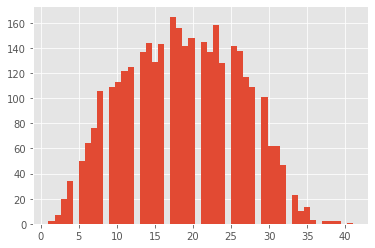

In [70]:
plt.style.use("ggplot")

plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [173]:
max_len = 50
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}


X = [[word2idx[w[0]] for w in s] for s in sentences]

X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words - 1)
y = [[tag2idx[w[1]] for w in s] for s in sentences]

y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])


y = [to_categorical(i, num_classes=n_tags) for i in y]


X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)



input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=5, input_length=max_len)(input)
# model = Embedding(input_dim=n_words, output_dim=10, input_length=max_len)(input)
# model = Embedding(input_dim=n_words, output_dim=20, input_length=max_len)(input)

model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=5, return_sequences=True, recurrent_dropout=0.1))(model)
# model = Bidirectional(LSTM(units=5, return_sequences=True, recurrent_dropout=0.1))(model)
# model = Bidirectional(LSTM(units=25, return_sequences=True, recurrent_dropout=0.1))(model)
# model = Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.1))(model)

out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

model = Model(input, out)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_tr, np.array(y_tr), batch_size=32, epochs=15, validation_split=0.2, verbose=1)
# history = model.fit(X_tr, np.array(y_tr), batch_size=32, epochs=5, validation_split=0.7, verbose=1)

Train on 2172 samples, validate on 543 samples
Epoch 1/15
2172/2172 [==============================] - 12s 6ms/step - loss: 2.1203 - acc: 0.9656 - val_loss: 1.4758 - val_acc: 0.9811
Epoch 2/15
2172/2172 [==============================] - 5s 2ms/step - loss: 0.9372 - acc: 0.9816 - val_loss: 0.5234 - val_acc: 0.9811
Epoch 3/15
2172/2172 [==============================] - 5s 2ms/step - loss: 0.3423 - acc: 0.9816 - val_loss: 0.2152 - val_acc: 0.9811
Epoch 4/15
2172/2172 [==============================] - 5s 2ms/step - loss: 0.1671 - acc: 0.9816 - val_loss: 0.1435 - val_acc: 0.9811
Epoch 5/15
2172/2172 [==============================] - 5s 2ms/step - loss: 0.1322 - acc: 0.9816 - val_loss: 0.1299 - val_acc: 0.9811
Epoch 6/15
2172/2172 [==============================] - 5s 2ms/step - loss: 0.1221 - acc: 0.9816 - val_loss: 0.1213 - val_acc: 0.9811
Epoch 7/15
2172/2172 [==============================] - 5s 2ms/step - loss: 0.1137 - acc: 0.9816 - val_loss: 0.1142 - val_acc: 0.9811
Epoch 8/15
217

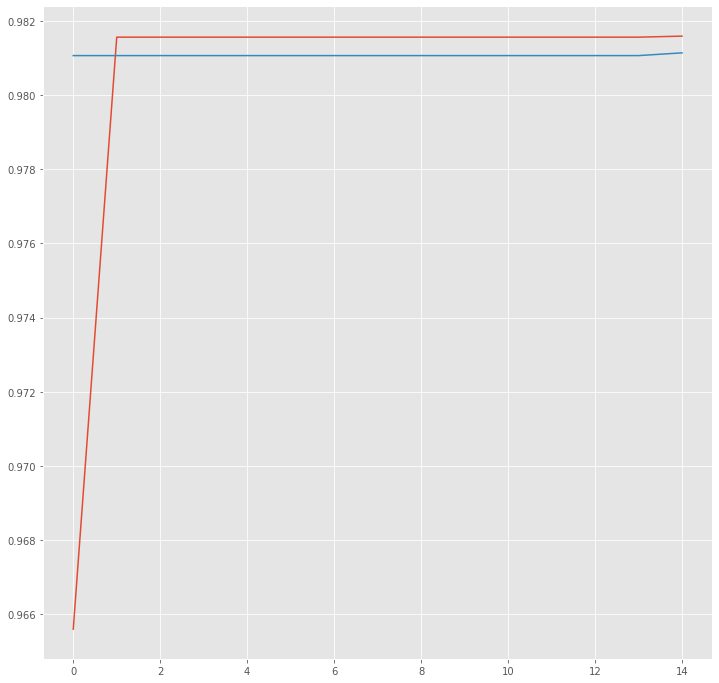

In [174]:
'''Accuracy is not a good measure here, because of the distribution of data (majority of fields are "O"). 
That is why validation accuracy remains unchanged.'''

hist = pd.DataFrame(history.history)

plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()

In [189]:
test_pred = np.argmax(test_pred, axis=-1)

# Now look at predictions.
for i in range(len(X_te)):
    
    p = model.predict(np.array([X_te[i]]))
    p = np.argmax(p, axis = -1)
    for w, pred in zip(X_te[i], p[0]):
        if tags[pred] is not 'O':
            print("{:15}: {:5}".format(wrds[w], tags[pred]))
        
    # p = model.predict(np.array([X_te[i]]))
# p = np.argmax(p, axis=-1)
# print("{:15} ({:5}): {}".format("Word", "Pred"))
# for w, pred in zip(X_te[i], p[0]):
#     print("{:15}: {}".format(words[w], tags[pred]))

Justin         : B-person
Justin         : B-person
Justin         : B-person
Twitter        : B-person
Twitter        : B-person
Justin         : B-person
